### Especificação

O objetivo deste projeto é construir um classificador de Spam usando o algoritmo de classificação Naive Bayes. 

O modelo de documento que usaremos aqui é um modelo de saco de palavras(bag of words). Usaremos o modelo bag of words:

- Com base na frequência de palavras (frequência de ocorrência de palavra no documento, o que tornará os atributos de entrada contínuos)

### Modelo Bag of Words

Um saco de palavras (bag of words) é uma representação de um texto como um agrupamento de palavras, sem qualquer consideração da sua estrutura gramatical ou da ordem das palavras. É simplesmente um histograma sobre as palavras da língua, e cada documento é representado como um vetor sobre estas palavras. As entradas neste vetor simplesmente correspondem à presença ou à ausência da palavra correspondente.

A seguir criaremos uma função para ler o conjunto de dados, verificar a frequência de palavras e então ajustar o modelo.

In [79]:
#Importando as bibliotecas
import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, precision_score

In [45]:
sns.set()
warnings.filterwarnings('ignore')

Exemplo simples. 

In [46]:
#Cria uma matix cujas linhas são frases, alocadas em uma única coluna
documents = ['Hello, how are you!',
             'Win money, win from home.',
             'Call me now.',
             'Hello, Call hello you tomorrow?']

Para obter a frequência de cada palavra em cada frase (linha), será utilizado a função CountVectorizer() do scikit learning.

In [47]:
count_vector = CountVectorizer() #set the variable

count_vector.fit(documents) #fit the function
count_vector.get_feature_names() #get the outputs
doc_array = count_vector.transform(documents).toarray()
doc_array
frequency_matrix = pd.DataFrame(doc_array,
                                columns = count_vector.get_feature_names()
                               )
frequency_matrix


,are,call,from,hello,home,how,me,money,now,tomorrow,win,you
0,1,0,0,1,0,1,0,0,0,0,0,1
1,0,0,1,0,1,0,0,1,0,0,2,0
2,0,1,0,0,0,0,1,0,1,0,0,0
3,0,1,0,2,0,0,0,0,0,1,0,1


### PART 1: DATA PREPROCESSING



#### Preparando o conjunto de dados

Temos que definir onde estão os diretórios do conjunto de treino e teste.

Em seguida temos que ler todos os e mails e armazená-los em uma lista, será armazenado também em outra lista o valor do e mail (spam ou notspam) e senpertence ao conjunto de trino ou de teste.

In [52]:
files_path='Dados\\train' # Local onde se encontram os dados
traintest=[]
documents=[]
my_label=[]
dirs = os.listdir(files_path)
for class_dir_name in dirs:
    print ("Processando datasset de teino {}. Aguarde...".format(class_dir_name))
    for f in os.listdir(os.path.join(files_path, class_dir_name)):
        document = os.path.join(files_path, class_dir_name, f)
        with open(document, 'r', encoding = "latin1") as file:
            words = file.read()
#             .split()
            documents.append(words)
            my_label.append(class_dir_name)
            traintest.append('train')
print ("O processo foi finalizado com sucesso ...")

Processando datasset de teino notspam. Aguarde...
Processando datasset de teino spam. Aguarde...
O processo foi finalizado com sucesso ...


In [53]:
files_path='Dados\\test' # Local onde se encontram os dados
dirs = os.listdir(files_path)
for class_dir_name in dirs:
    print ("Processando {}. Seja paciente e aguarde...".format(class_dir_name))
    for f in os.listdir(os.path.join(files_path, class_dir_name)):
        document = os.path.join(files_path, class_dir_name, f)
        with open(document, 'r', encoding = "latin1") as file:
            words = file.read()
#             .split()
            documents.append(words)
            my_label.append(class_dir_name)
            traintest.append('test')
print ("O processo foi finalizado com sucesso ...")

Processando notspam. Seja paciente e aguarde...
Processando spam. Seja paciente e aguarde...
O processo foi finalizado com sucesso ...


A seguir será criado um dataframe contendo a classificação na primera colulna e o e-mail na segunda. Iremos também substituir as strings notspam e spam por 0 e 1 respectivamente

In [54]:
Dict = {'Dividir':traintest,'labels': my_label, 'mensagem': documents} 

In [55]:
df=pd.DataFrame(Dict)
df['labels'] = df.labels.map({'notspam':0, 'spam':1})

In [56]:
df.head()

,Dividir,labels,mensagem
0,train,0,From exmh-workers-admin@redhat.com Thu Aug 22...
1,train,0,Return-Path: <Online#3.19578.34-UgGTgZFN19NAr9...
2,train,0,Return-Path: <Online#3.19584.83-p1SYlJ1blFvQjR...
3,train,0,Return-Path: <Online#3.19586.b5-9w0blztbvHPdZd...
4,train,0,Return-Path: <update@list.theregister.co.uk>\n...


Preparando os dados com a função CountVectorizer

In [27]:
count_vector = CountVectorizer() #set the variable
dataset_transformado = count_vector.fit_transform(documents)

#### Dividindo o datasset em trinamento e teste.

In [71]:
# indices do datassest de traino e de teste
slice_indices=np.arange(df.shape[0])
slice_train=slice_indices[df.Dividir=='train']
slice_test=slice_indices[df.Dividir=='test']

In [72]:
X_train=dataset_transformado[slice_train,:]
X_test=dataset_transformado[slice_test,:]

In [73]:
y_train=df.labels[df.Dividir=='train']
y_test=df.labels[df.Dividir=='test']

### PART 2: AJUSTANDO O MODELO

In [74]:
naive_bayes = MultinomialNB() #call the method
naive_bayes.fit(X_train, y_train) #train the classifier on the training set

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [75]:
predictions = naive_bayes.predict(X_train) #predic using the model on the testing set

In [76]:
print('accuracy score: {}'.format(accuracy_score(y_train,predictions)))
print('precision score: {}'.format(precision_score(y_train,predictions)))

accuracy score: 0.9875283446712018
precision score: 0.9983122362869198


### PART 3: AVALIANDO O MODELO

Para avaliar o modelo utilizaremos uma Validação cruzada k-Fold.

In [81]:
# Aplicando validação cruzada de 5 folds
mnb = MultinomialNB()
scores = cross_val_score(mnb, X_train, y_train, cv = 5, scoring='accuracy')

print('Cross-validation scores:{}'.format(scores))

Cross-validation scores:[0.80188679 0.97542533 0.97920605 0.95652174 0.97542533]


In [86]:
cross_val_score?

In [82]:
# computar Pontuação média de validação cruzada

print('Pontuação média de validação cruzada: {:.4f}'.format(scores.mean()))

Pontuação média de validação cruzada: 0.9377


### PART 4: FAZENDO PREVISÕES

Com o modelo ajustado, é necessário testar sua capacidade de predizer valores de mensagens que ele ainda não tenha visto. Assim, ireos carregar o arquivo de teste e utilizar o modelo ajustado para predizer os valores dos e-mails. E então comparar com seu real valor.

#### Predizendo os valores dos dados de teste.

In [83]:
predictions = naive_bayes.predict(X_test) #predic using the model on the testing set
print('accuracy score: {}'.format(accuracy_score(y_test,predictions)))
print('precision score: {}'.format(precision_score(y_test,predictions)))

accuracy score: 0.9733750978856696
precision score: 0.9877729257641922


Text(0.5, 12.453125, 'Predicted label')

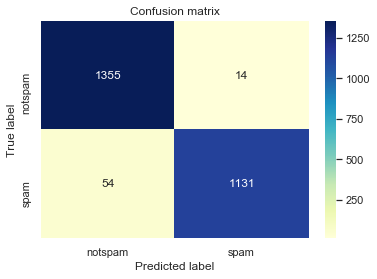

In [84]:
#confusion_matrix
cnf_matrix = confusion_matrix(y_test,predictions)
p = sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g',yticklabels=['notspam','spam'],xticklabels=['notspam','spam'])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')

Text(0.5, 12.453125, 'Predicted label')

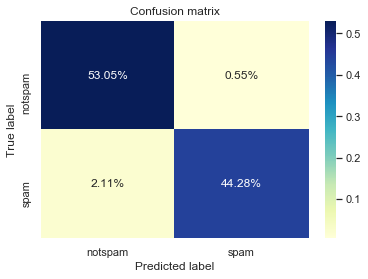

In [89]:
p=sns.heatmap(cnf_matrix/np.sum(cnf_matrix), annot=True, fmt='.2%', cmap="YlGnBu" ,yticklabels=['notspam','spam'],xticklabels=['notspam','spam'])
plt.title('Confusion matrix', y=1.1)
plt.ylabel('True label')
plt.xlabel('Predicted label')